In [1]:

# Cell 1: Load Data  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.mixture import GaussianMixture  

OUTPUT_DIR = r"D:\data mining\appendix"  

resnet_features = np.load(f'{OUTPUT_DIR}/resnet_features.npy')  
true_labels = np.load(f'{OUTPUT_DIR}/true_labels.npy')  
umap_embeddings = np.load(f'{OUTPUT_DIR}/umap_embeddings.npy')  

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#C7CEEA']  

print(f"Features loaded: {resnet_features.shape}")  




Features loaded: (2527, 512)


In [2]:

# Cell 2: Fit GMM in 512D Space  
print("Fitting GMM to 512D features...")  

gmm_512d = GaussianMixture(n_components=6, covariance_type='full', random_state=42)  
gmm_512d.fit(resnet_features)  

log_likelihood = gmm_512d.score_samples(resnet_features)  

print(f"GMM fitted successfully")  
print(f"Log-likelihood statistics:")  
print(f"  Mean: {log_likelihood.mean():.2f}")  
print(f"  Std: {log_likelihood.std():.2f}")  
print(f"  Min: {log_likelihood.min():.2f}")  
print(f"  Max: {log_likelihood.max():.2f}")  


Fitting GMM to 512D features...
GMM fitted successfully
Log-likelihood statistics:
  Mean: 476.89
  Std: 203.58
  Min: 226.44
  Max: 1020.73


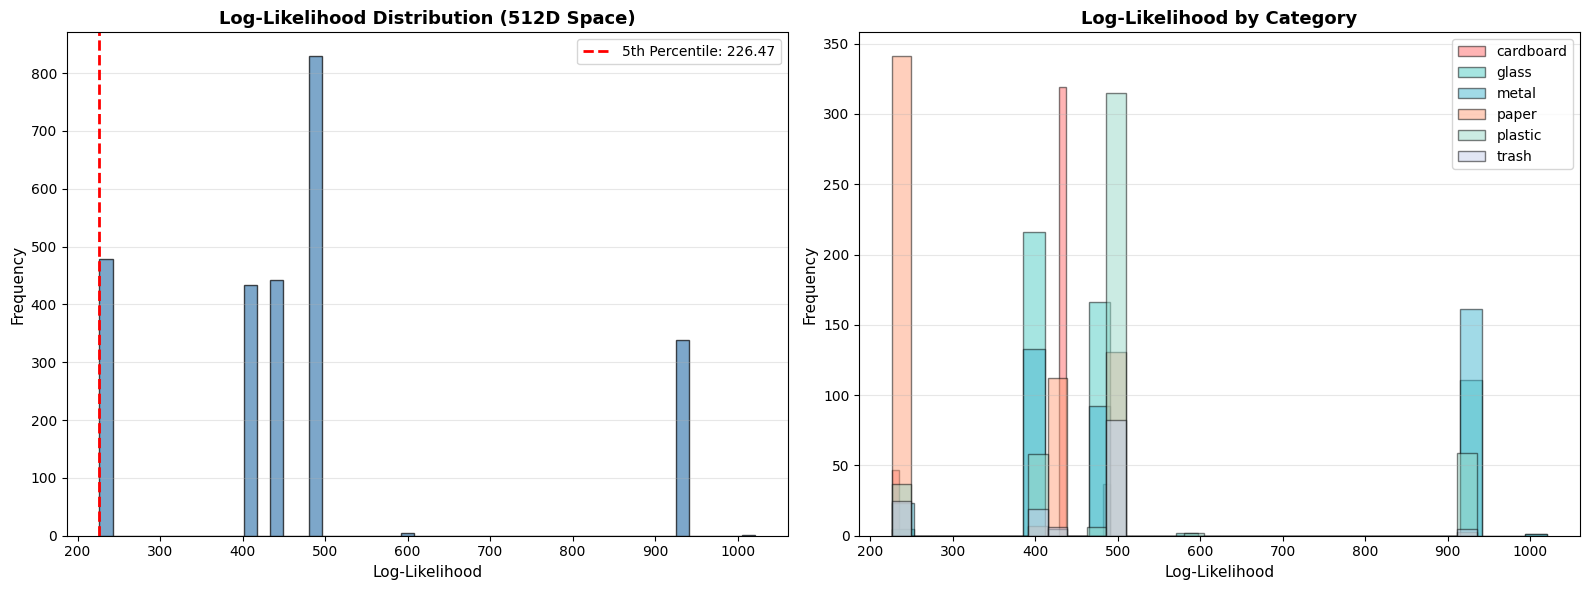

In [7]:

# Cell 3: Overall Density Distribution 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

axes[0].hist(log_likelihood, bins=50, color='steelblue',   
            edgecolor='black', alpha=0.7)  
threshold_5 = np.percentile(log_likelihood, 5)  
axes[0].axvline(threshold_5, color='red', linestyle='--', linewidth=2,  
               label=f'5th Percentile: {threshold_5:.2f}')  
axes[0].set_title('Log-Likelihood Distribution (512D Space)',   
                 fontsize=13, fontweight='bold')  
axes[0].set_xlabel('Log-Likelihood', fontsize=11)  
axes[0].set_ylabel('Frequency', fontsize=11)  
axes[0].legend(fontsize=10)  
axes[0].grid(alpha=0.3, axis='y')  

for i, (cat, color) in enumerate(zip(class_names, colors)):  
    mask = true_labels == i  
    axes[1].hist(log_likelihood[mask], bins=30, alpha=0.5,   
                label=cat, color=color, edgecolor='black')  

axes[1].set_title('Log-Likelihood by Category', fontsize=13, fontweight='bold')  
axes[1].set_xlabel('Log-Likelihood', fontsize=11)  
axes[1].set_ylabel('Frequency', fontsize=11)  
axes[1].legend(fontsize=10)  
axes[1].grid(alpha=0.3, axis='y')  

plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/06_gmm_density_distribution.png',   
           dpi=300, bbox_inches='tight')  
plt.show()  


Fitting GMM on UMAP 2D space for visualization...


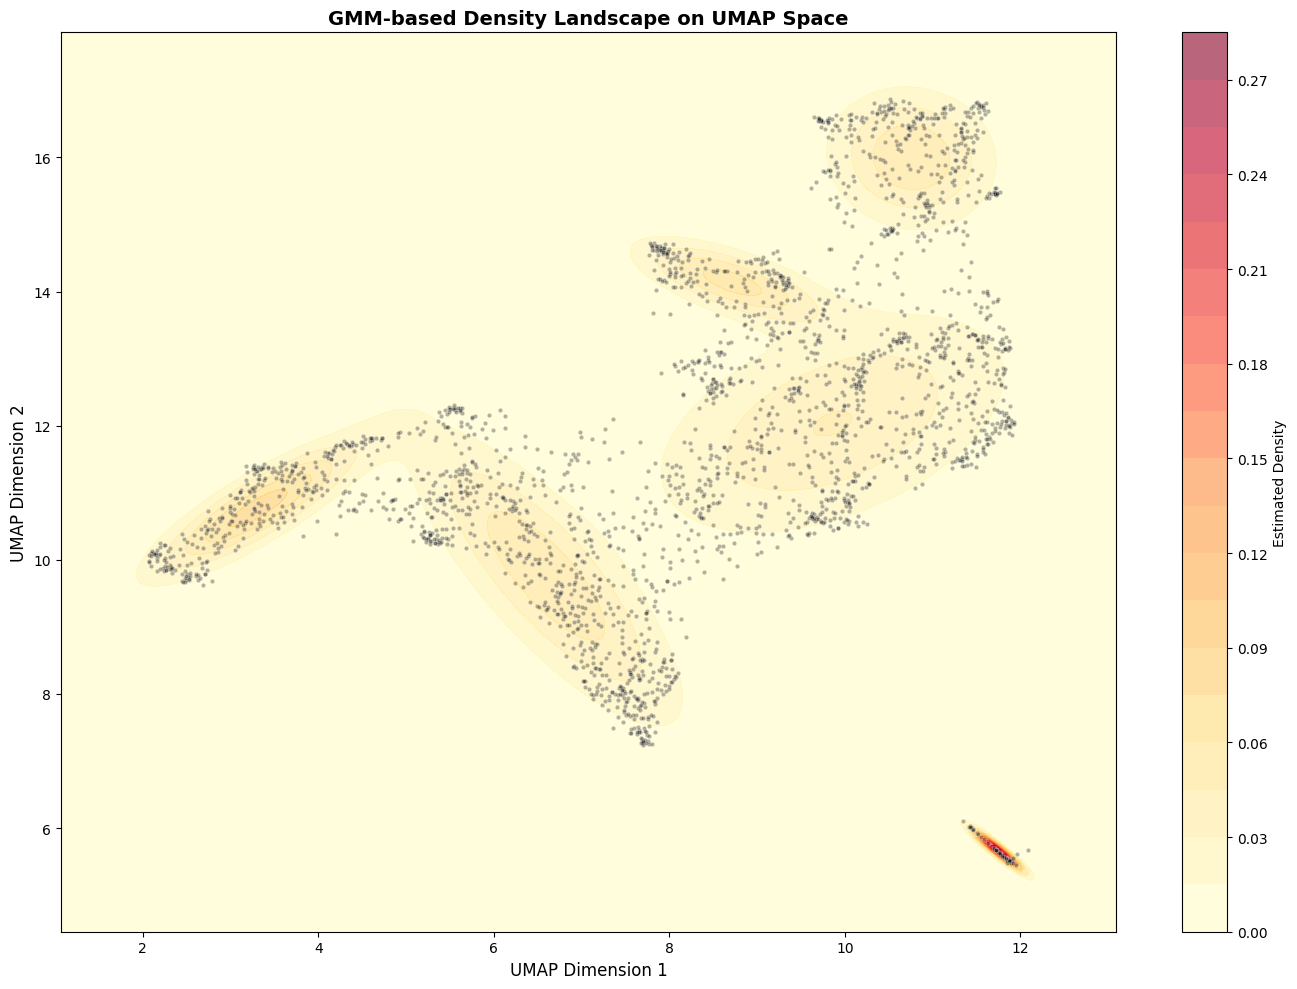

In [8]:

# Cell 4: Density Landscape on UMAP Space  
print("Fitting GMM on UMAP 2D space for visualization...")  

gmm_2d = GaussianMixture(n_components=6, covariance_type='full', random_state=42)  
gmm_2d.fit(umap_embeddings)  

x_min, x_max = umap_embeddings[:, 0].min() - 1, umap_embeddings[:, 0].max() + 1  
y_min, y_max = umap_embeddings[:, 1].min() - 1, umap_embeddings[:, 1].max() + 1  
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),  
                     np.linspace(y_min, y_max, 200))  

grid_points = np.c_[xx.ravel(), yy.ravel()]  
Z = np.exp(gmm_2d.score_samples(grid_points))  
Z = Z.reshape(xx.shape)  

plt.figure(figsize=(14, 10))  
plt.contourf(xx, yy, Z, levels=20, cmap='YlOrRd', alpha=0.6)  
plt.colorbar(label='Estimated Density')  

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],   
           c='black', s=10, alpha=0.3, edgecolors='white', linewidth=0.5)  

plt.title('GMM-based Density Landscape on UMAP Space',   
         fontsize=14, fontweight='bold')  
plt.xlabel('UMAP Dimension 1', fontsize=12)  
plt.ylabel('UMAP Dimension 2', fontsize=12)  
plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/06_density_landscape.png', dpi=300, bbox_inches='tight')  
plt.show()  



Outliers detected: 127 (5.03%)


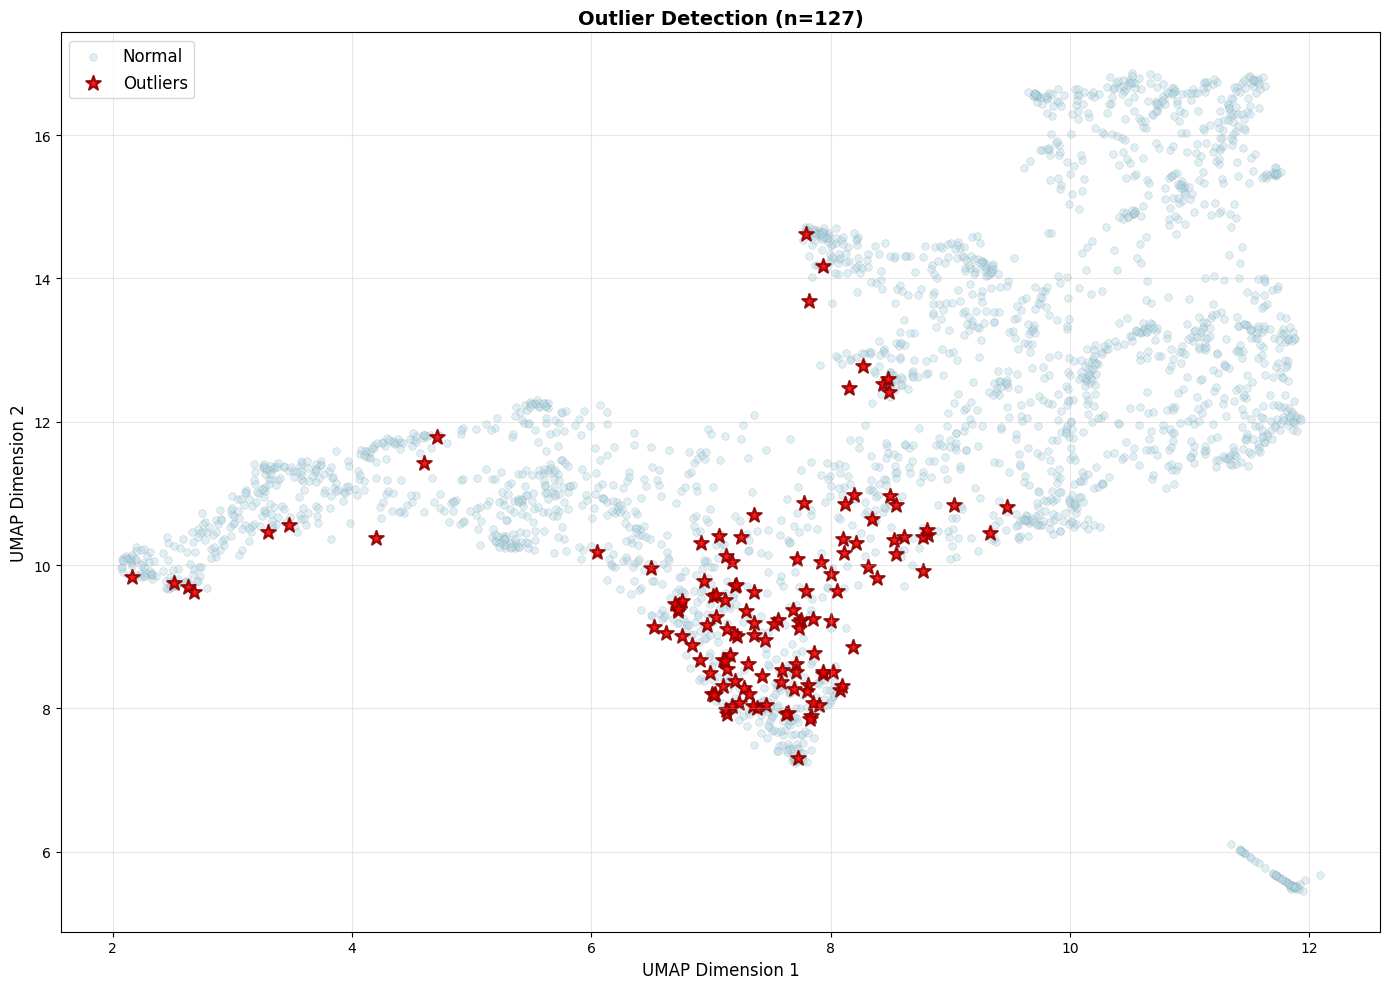

In [9]:

# Cell 5: Outlier Detection  
threshold = np.percentile(log_likelihood, 5)  
outliers = log_likelihood < threshold  

print(f"\nOutliers detected: {outliers.sum()} ({outliers.sum()/len(outliers)*100:.2f}%)")  

plt.figure(figsize=(14, 10))  
plt.scatter(umap_embeddings[~outliers, 0], umap_embeddings[~outliers, 1],   
           c='lightblue', s=30, alpha=0.4, label='Normal',   
           edgecolors='gray', linewidth=0.3)  
plt.scatter(umap_embeddings[outliers, 0], umap_embeddings[outliers, 1],   
           c='red', s=120, alpha=0.9, label='Outliers',   
           marker='*', edgecolors='darkred', linewidth=1.5)  

plt.title(f'Outlier Detection (n={outliers.sum()})', fontsize=14, fontweight='bold')  
plt.xlabel('UMAP Dimension 1', fontsize=12)  
plt.ylabel('UMAP Dimension 2', fontsize=12)  
plt.legend(fontsize=12)  
plt.grid(alpha=0.3)  
plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/06_outlier_detection.png', dpi=300, bbox_inches='tight')  
plt.show()  



Outliers by class:
  cardboard: 31 (7.69%)
  glass: 4 (0.80%)
  metal: 5 (1.22%)
  paper: 68 (11.45%)
  plastic: 12 (2.49%)
  trash: 7 (5.11%)


C:\Users\倪晗骏\AppData\Local\Temp\ipykernel_13988\2747964802.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(classes, rotation=45)
C:\Users\倪晗骏\AppData\Local\Temp\ipykernel_13988\2747964802.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(classes, rotation=45)


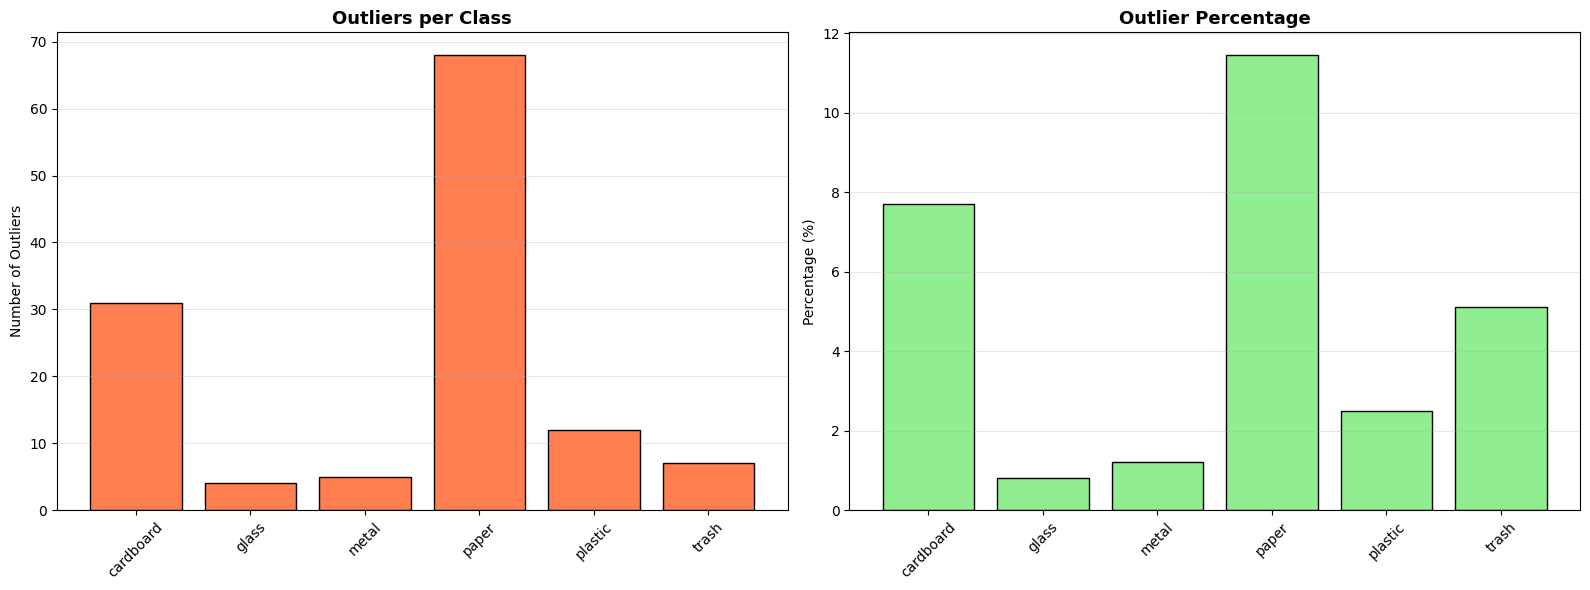

In [10]:

# Cell 6: Outlier Analysis by Class  
outlier_counts = {}  
for i, class_name in enumerate(class_names):  
    class_mask = true_labels == i  
    class_outliers = np.sum(outliers & class_mask)  
    total = np.sum(class_mask)  
    outlier_counts[class_name] = {  
        'count': class_outliers,  
        'percentage': (class_outliers / total) * 100  
    }  

print("\nOutliers by class:")  
for cn, stats in outlier_counts.items():  
    print(f"  {cn}: {stats['count']} ({stats['percentage']:.2f}%)")  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

classes = list(outlier_counts.keys())  
counts = [outlier_counts[c]['count'] for c in classes]  
percentages = [outlier_counts[c]['percentage'] for c in classes]  

axes[0].bar(classes, counts, color='coral', edgecolor='black')  
axes[0].set_title('Outliers per Class', fontsize=13, fontweight='bold')  
axes[0].set_xticklabels(classes, rotation=45)  
axes[0].set_ylabel('Number of Outliers')  
axes[0].grid(alpha=0.3, axis='y')  

axes[1].bar(classes, percentages, color='lightgreen', edgecolor='black')  
axes[1].set_title('Outlier Percentage', fontsize=13, fontweight='bold')  
axes[1].set_xticklabels(classes, rotation=45)  
axes[1].set_ylabel('Percentage (%)')  
axes[1].grid(alpha=0.3, axis='y')  

plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/06_outlier_by_class.png', dpi=300, bbox_inches='tight')  
plt.show()  


Cluster-wise density statistics:
   cluster  mean_density  std_density  n_outliers  size
0        0    440.751312    75.341415           3   621
1        1    386.768829   122.788933          54   571
2        2    879.292297   155.690903           0   364
3        3    275.526154   102.441917          53   284
4        4    476.428589   100.096222           8   335
5        5    433.649200    49.710655           9   352


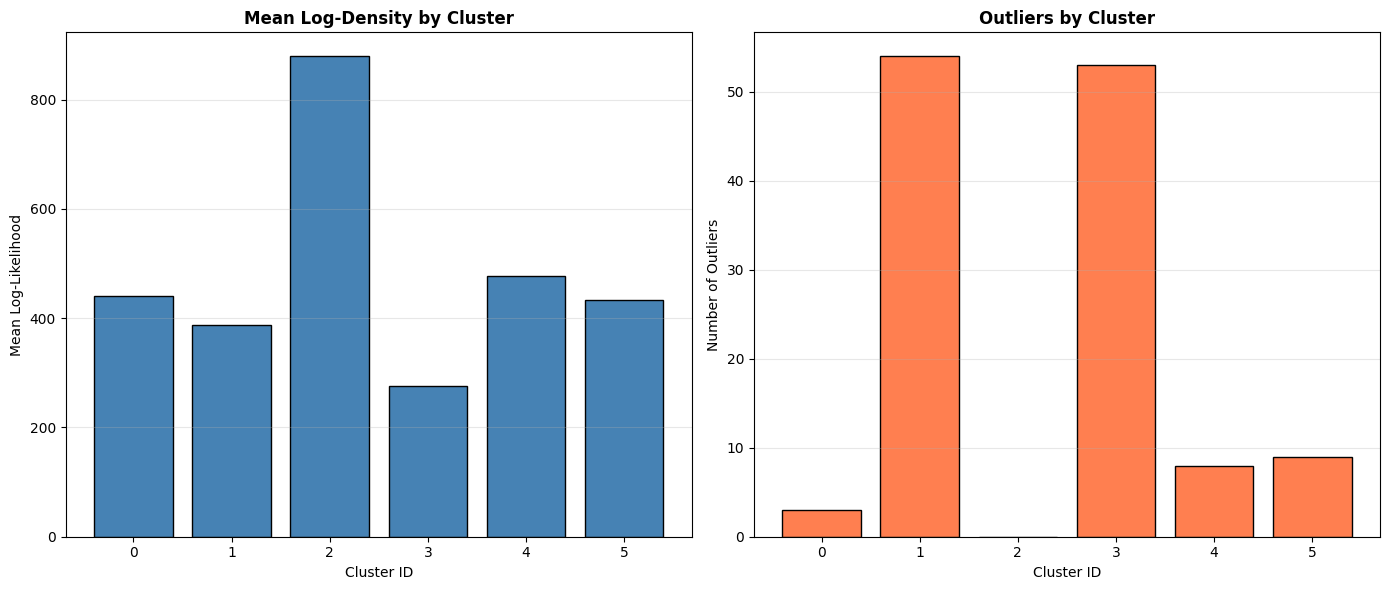

In [14]:

# Cell 7: Cluster-wise Density Analysis  
from sklearn.cluster import KMeans  
import pandas as pd
kmeans_6 = KMeans(n_clusters=6, random_state=42)  
cluster_labels = kmeans_6.fit_predict(umap_embeddings)  

cluster_densities = []  
for i in range(6):  
    mask = cluster_labels == i  
    cluster_log_lik = log_likelihood[mask]  
    cluster_densities.append({  
        'cluster': i,  
        'mean_density': cluster_log_lik.mean(),  
        'std_density': cluster_log_lik.std(),  
        'n_outliers': np.sum(outliers & mask),  
        'size': mask.sum()  
    })  

density_df = pd.DataFrame(cluster_densities)  
print("\nCluster-wise density statistics:")  
print(density_df)  

plt.figure(figsize=(14, 6))  

plt.subplot(1, 2, 1)  
plt.bar(density_df['cluster'], density_df['mean_density'],   
       color='steelblue', edgecolor='black')  
plt.title('Mean Log-Density by Cluster', fontsize=12, fontweight='bold')  
plt.xlabel('Cluster ID')  
plt.ylabel('Mean Log-Likelihood')  
plt.grid(alpha=0.3, axis='y')  

plt.subplot(1, 2, 2)  
plt.bar(density_df['cluster'], density_df['n_outliers'],   
       color='coral', edgecolor='black')  
plt.title('Outliers by Cluster', fontsize=12, fontweight='bold')  
plt.xlabel('Cluster ID')  
plt.ylabel('Number of Outliers')  
plt.grid(alpha=0.3, axis='y')  

plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/06_cluster_density_analysis.png', dpi=300, bbox_inches='tight')  
plt.show()  


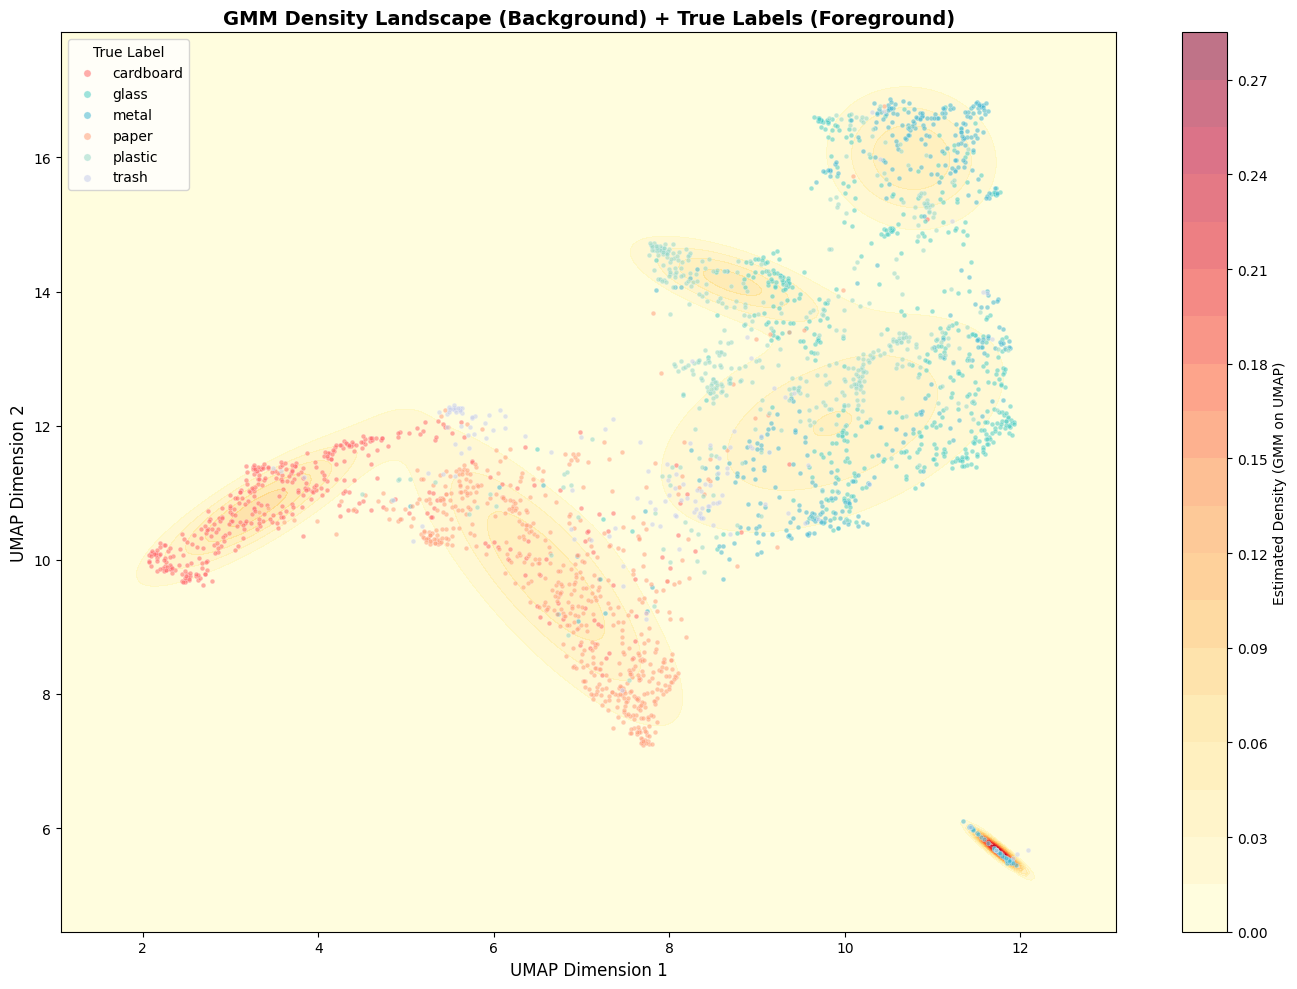

In [15]:
plt.figure(figsize=(14, 10))
plt.contourf(xx, yy, Z, levels=20, cmap='YlOrRd', alpha=0.55)
plt.colorbar(label='Estimated Density (GMM on UMAP)')

# label-colored points + legend
for k, name in enumerate(class_names):
    idx = (true_labels == k)
    plt.scatter(
        umap_embeddings[idx, 0], umap_embeddings[idx, 1],
        s=12, alpha=0.55, c=colors[k], label=name,
        edgecolors='white', linewidth=0.3
    )

plt.title('GMM Density Landscape (Background) + True Labels (Foreground)',
          fontsize=14, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.legend(title="True Label", markerscale=1.5, frameon=True, loc='best')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_density_landscape_labeled.png', dpi=300, bbox_inches='tight')
plt.show()

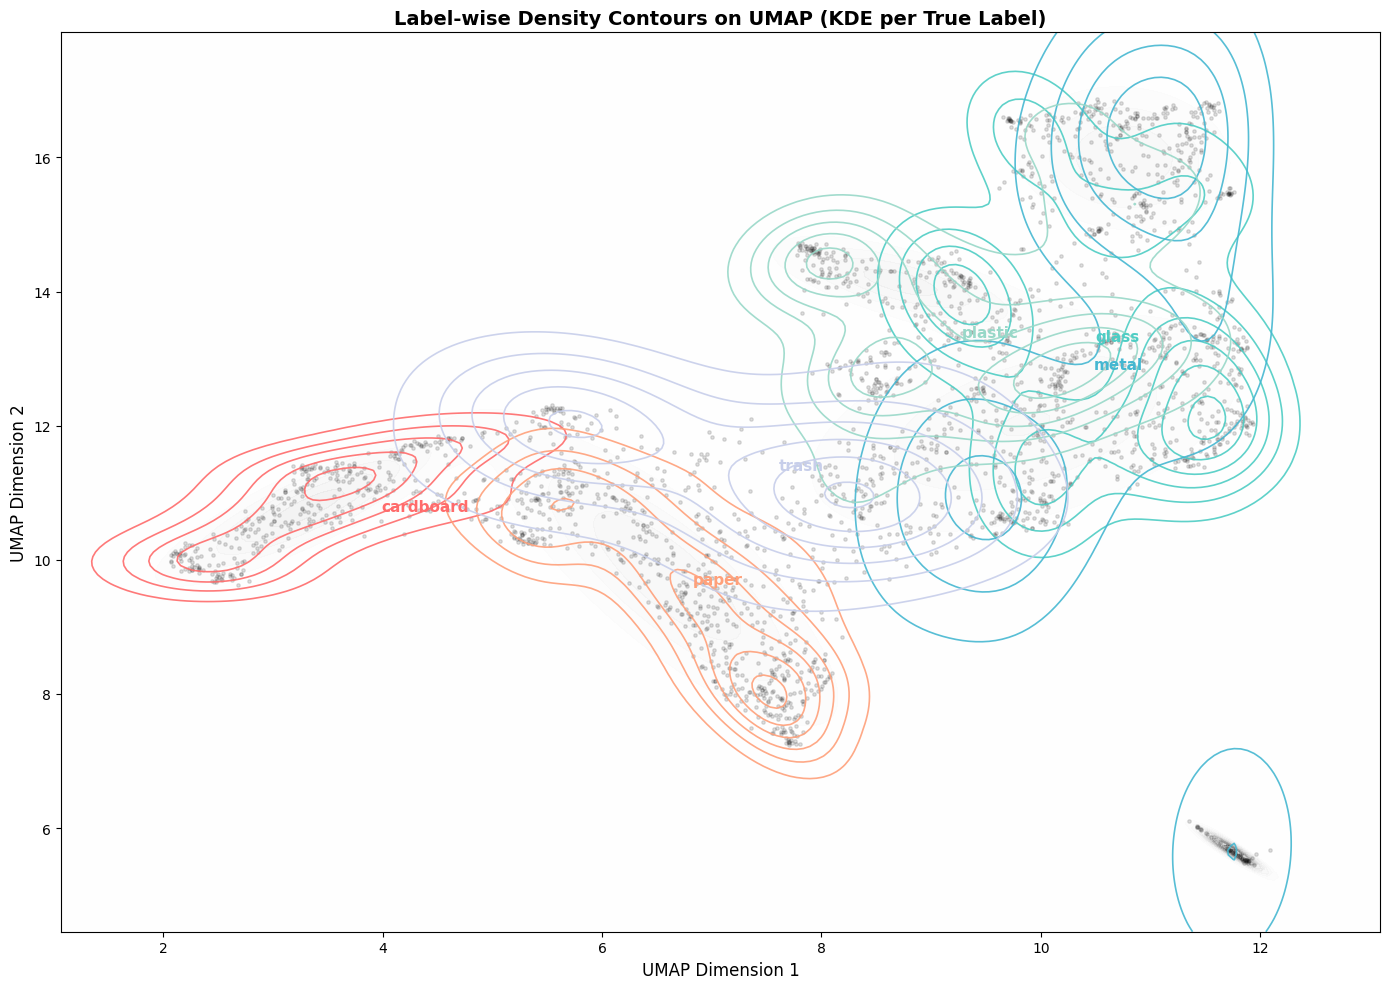

In [16]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(14, 10))


plt.contourf(xx, yy, Z, levels=20, cmap='Greys', alpha=0.25)

# grid_points : shape (200*200, 2)
for k, name in enumerate(class_names):
    idx = (true_labels == k)
    Xk = umap_embeddings[idx].T  # (2, nk)

    kde = gaussian_kde(Xk)  # KDE in 2D
    Zk = kde(grid_points.T).reshape(xx.shape)

 
    plt.contour(
        xx, yy, Zk,
        levels=6, linewidths=1.2,
        colors=[colors[k]], alpha=0.9
    )

 
    cx, cy = umap_embeddings[idx].mean(axis=0)
    plt.text(cx, cy, name, fontsize=11, fontweight='bold', color=colors[k])


plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c='black', s=6, alpha=0.12)

plt.title('Label-wise Density Contours on UMAP (KDE per True Label)',
          fontsize=14, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_density_landscape_labelwise_contours.png', dpi=300, bbox_inches='tight')
plt.show()

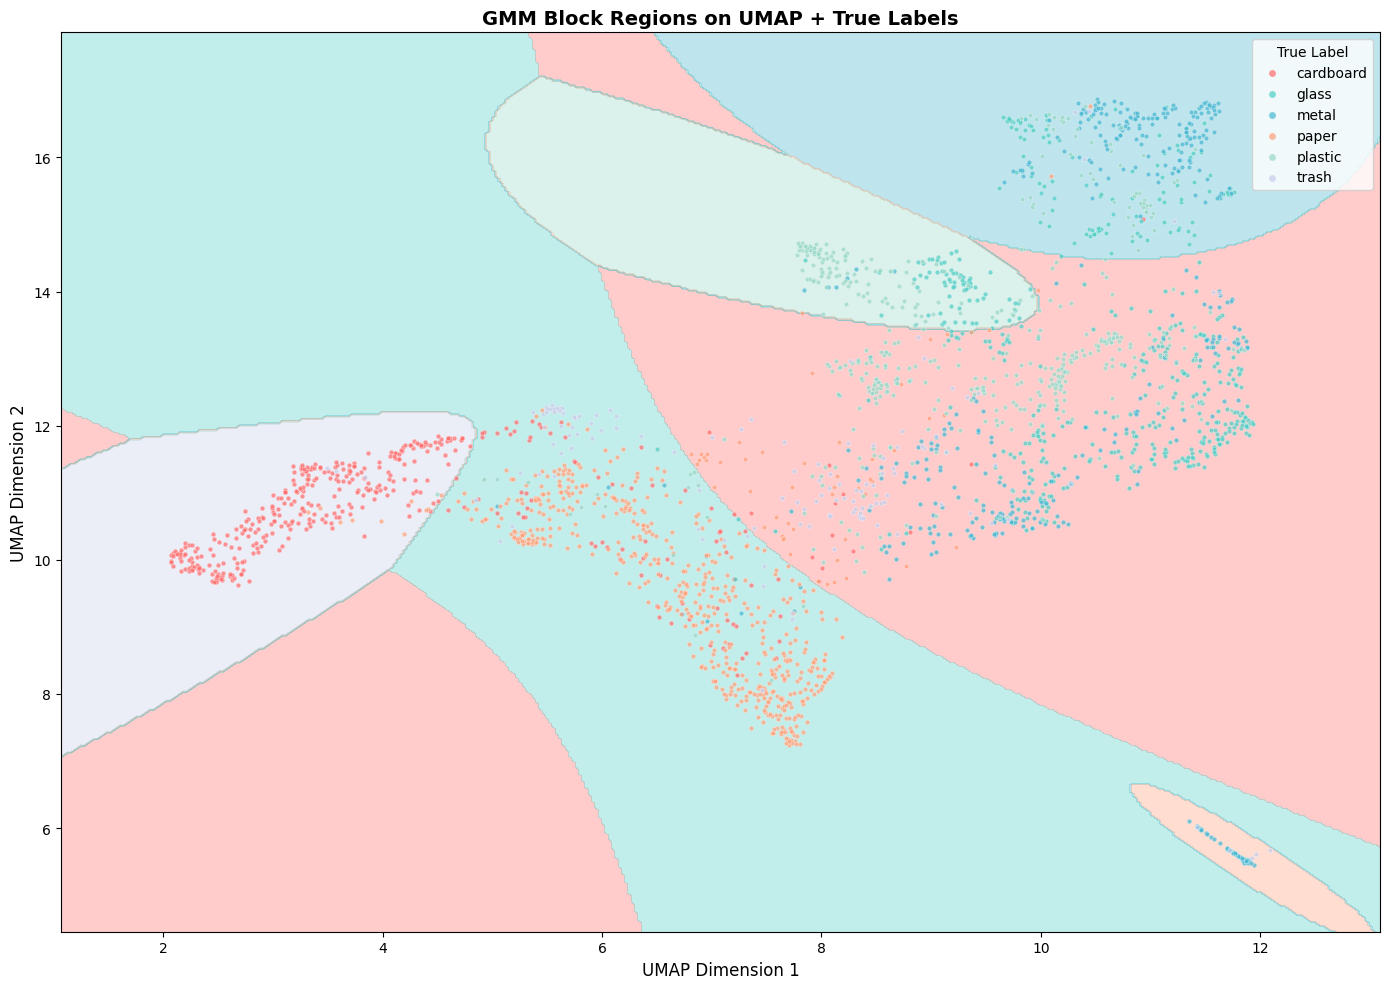

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.mixture import GaussianMixture

# Fit GMM on UMAP 2D
gmm_2d = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm_2d.fit(umap_embeddings)

# grid
x_min, x_max = umap_embeddings[:, 0].min() - 1, umap_embeddings[:, 0].max() + 1
y_min, y_max = umap_embeddings[:, 1].min() - 1, umap_embeddings[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# BLOCKS: each grid point -> which component
grid_comp = gmm_2d.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(14, 10))
cmap_blocks = ListedColormap(colors)

# discrete blocks (NOT density)
plt.contourf(
    xx, yy, grid_comp,
    levels=np.arange(-0.5, 6.5, 1),
    cmap=cmap_blocks, alpha=0.35
)

# overlay true labels points + legend
for k, name in enumerate(class_names):
    idx = (true_labels == k)
    plt.scatter(umap_embeddings[idx, 0], umap_embeddings[idx, 1],
                s=12, alpha=0.70, c=colors[k], label=name,
                edgecolors='white', linewidth=0.3)

plt.title('GMM Block Regions on UMAP + True Labels', fontsize=14, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.legend(title="True Label", markerscale=1.5, frameon=True, loc='best')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_gmm_block_regions.png', dpi=300, bbox_inches='tight')
plt.show()

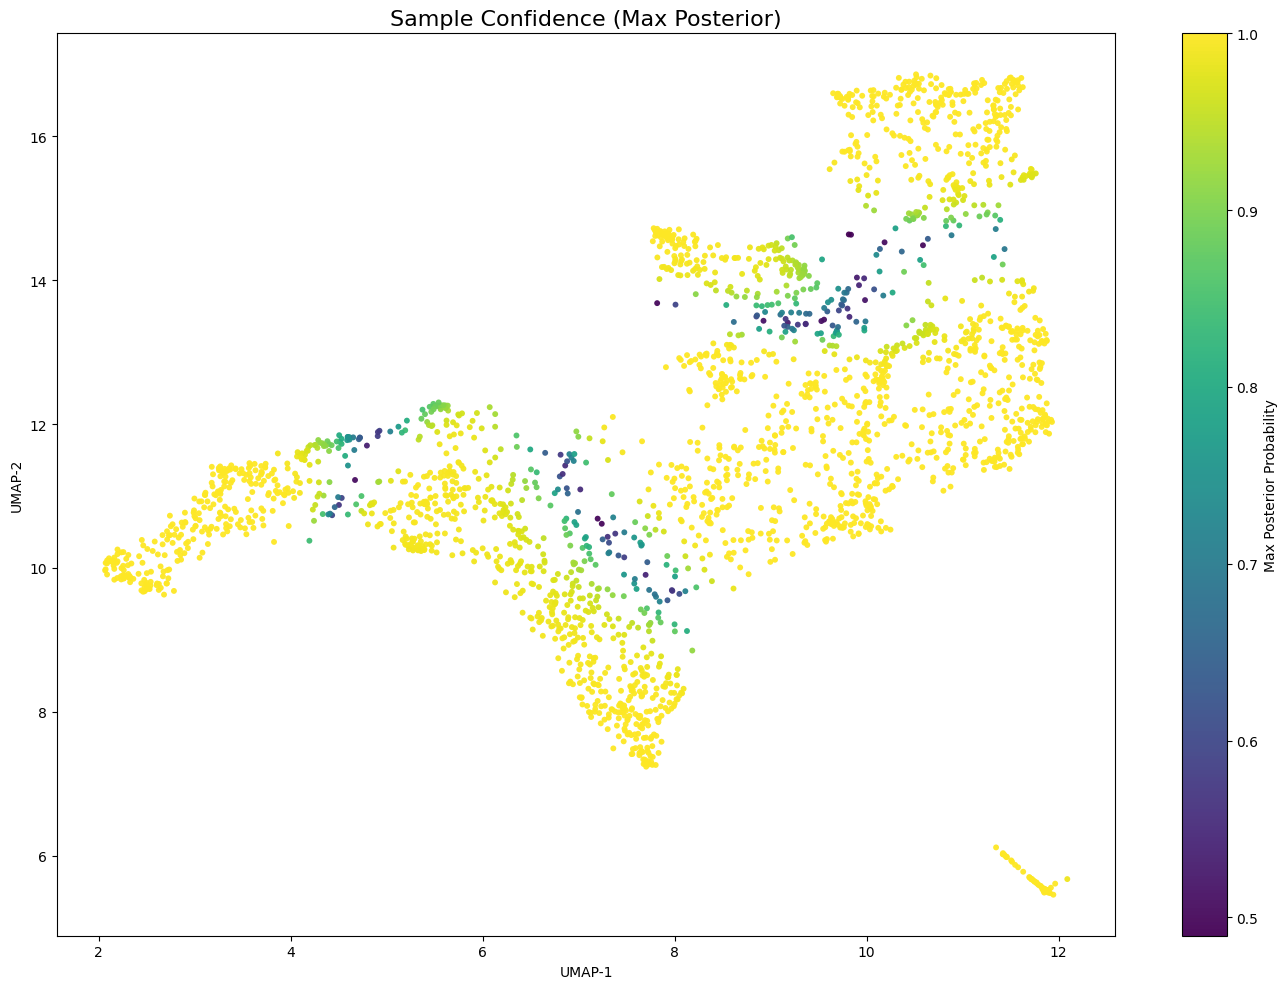

In [18]:
resp = gmm_2d.predict_proba(umap_embeddings)   # (N, 6)
max_post = resp.max(axis=1)                   # (N,)

plt.figure(figsize=(14, 10))
sc = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],
                 c=max_post, s=18, cmap='viridis',
                 edgecolors='none', alpha=0.95)
plt.colorbar(sc, label='Max Posterior Probability')
plt.title('Sample Confidence (Max Posterior)', fontsize=16)
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_gmm_max_posterior.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
import numpy as np
from sklearn.mixture import GaussianMixture

OUTPUT_DIR = r"D:\data mining\appendix"


log_likelihood = gmm_512d.score_samples(resnet_features)  


np.save(f"{OUTPUT_DIR}/log_likelihood.npy", log_likelihood)

print("saved:", f"{OUTPUT_DIR}/log_likelihood.npy", "shape=", log_likelihood.shape)
print("min/max:", log_likelihood.min(), log_likelihood.max())

saved: D:\data mining\appendix/log_likelihood.npy shape= (2527,)
min/max: 226.44292 1020.73157
